<a href="https://colab.research.google.com/github/Adrianav0510/DeltaNews/blob/main/DeltaNews_Ejemplo30Links.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIENVENIDO A DELTA NEWS

## PREAMBULO
Primero ejecute estas celdas para el correcto funcionamiento del codigo.

Para ejecutar, tan solo haga click en el botón de simbolo "play".

###INSTALADOR DE BIBLIOTECAS
Primero ejecute estas celdas

In [41]:
%%capture
#WEB SCRAPING
!pip install nltk
!pip install newspaper3k

#ANALISIS DE SENTIMIENTOS
#TRADUCTOR
!pip install translate
!pip install googletrans==3.1.0a0

#ANALISIS DE SENTIMIENTOS
!pip install textblob

import pandas as pd
import nltk
from newspaper import Article
from googletrans import Translator
from textblob import TextBlob
from nltk.corpus import stopwords

#VISUALIZACIONES
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

###+30 links de ejemplo
Ejecutar la celda para la demostración.
Aviso - mucho texto

In [42]:
UrlHeraldo=[
    "https://www.elheraldo.co/colombia/presidente-gustavo-petro-asegura-que-no-se-exigira-pasaporte-los-migrantes-venezolanos",
    "https://www.elheraldo.co/mundo/militares-venezolanos-evacuan-30-mineros-ilegales-colombianos-de-la-amazonia-1073353",
    "https://www.elheraldo.co/colombia/presidente-petro-anuncio-que-universidades-publicas-abriran-de-manera-gratuita-venezolanos"
]

UrlVanguardia=[
    "https://www.vanguardia.com/judicial/2024/03/21/mujer-fue-asesinada-a-golpes-y-disparos-su-hermana-resulto-herida/",
    "https://www.vanguardia.com/mundo/2024/03/06/video-panama-encarcela-por-seis-meses-a-los-45-migrantes-que-vandalizaron-un-albergue-en-darien/",
    "https://www.vanguardia.com/mundo/2024/03/07/fallas-electricas-en-venezuela-impactan-la-libertad-de-expresion-y-el-acceso-a-la-informacion/",
    "https://www.vanguardia.com/judicial/2024/03/07/cadaver-de-mujer-fue-hallado-con-los-brazos-amputados/",
    "https://www.vanguardia.com/juntossomosmas/2024/03/08/videopodcast-inspirador-de-vanguardia-y-usaid-testimonios-de-mujeres-migrantes-valientes-en-bucaramanga/",
    "https://www.vanguardia.com/juntossomosmas/2024/03/09/la-inspiradora-travesia-de-la-profe-genesis-coach-vocal-de-ninos-para-la-voz-kids-en-colombia/",
    "https://www.vanguardia.com/economia/local/2024/03/09/miriam-alexei-y-karelys-una-historia-de-esperanza-y-superacion-en-tierras-colombianas/",
    "https://www.vanguardia.com/judicial/2024/03/21/mujer-fue-asesinada-a-golpes-y-disparos-su-hermana-resulto-herida/",
    "https://www.vanguardia.com/mundo/2024/03/30/detenido-un-hombre-en-venezuela-que-obligo-a-cerca-de-70-mujeres-a-prostituirse/"
]

UrlUniversal=[
    "https://www.eluniversal.com.co/colombia/2024/02/22/migracion-venezolana-en-colombia-disminuyo-en-2023-por-primera-vez-en-10-anos/",
    "https://www.eluniversal.com.co/colombia/2024/01/30/mas-de-539000-migrantes-cruzaron-el-darien-en-2023-migracion-colombia/",
    "https://www.eluniversal.com.co/palante-chamos-y-chamas/2024/02/12/migrantes-participan-en-la-construccion-del-plan-de-desarrollo-en-cartagena/",
    "https://www.eluniversal.com.co/palante-chamos-y-chamas/2024/02/05/zumara-supero-el-hambre-y-el-abandono-hoy-persigue-suenos-en-cartagena/",
    "https://www.eluniversal.com.co/colombia/2022/04/26/migracion-colombia-levanta-pico-y-cedula-para-entrar-desde-venezuela/",
    "https://www.eluniversal.com.co/palante-chamos-y-chamas/2024/06/19/colombia-legaliza-tutores-de-ninos-venezolanos-con-el-pep-tutor/",
    "https://www.eluniversal.com.co/colombia/2024/06/19/migrantes-venezolanos-en-colombia-tendria-permiso-especial-de-permanencia/",
    "https://www.eluniversal.com.co/colombia/2024/06/02/violencia-de-bandas-criminales-sacude-a-cucuta-al-menos-30-asesinatos-en-mayo/",
    "https://www.eluniversal.com.co/cartagena/2024/07/09/expulsada-del-pais-extranjera-que-portaba-documentos-falsos-en-cartagena/",
    "https://www.eluniversal.com.co/sucesos/2024/07/15/atroz-feminicidio-mujer-murio-tras-recibir-mas-de-50-punaladas-de-su-expareja/",
    "https://www.eluniversal.com.co/sucesos/2024/07/01/dos-hombres-lo-amenazaron-busco-un-arma-y-los-mato-a-bala-esta-preso/",
    "https://www.eluniversal.com.co/sucesos/2024/06/26/capturan-a-ciudadano-extranjero-solicitado-por-agredir-a-funcionario-publico/",
    "https://www.eluniversal.com.co/sucesos/2024/06/14/identifican-a-la-mujer-decapitada-este-viernes-en-santo-tomas-atlantico/",
    "https://www.eluniversal.com.co/sucesos/2024/05/30/estas-son-las-6-mujeres-que-han-asesinado-en-lo-que-va-del-ano-en-cartagena/"
]

UrlColombiano=[
    "https://www.elcolombiano.com/opinion/editoriales/los-venezolanos-esa-enorme-minoria-CG23701300",
    "https://www.elcolombiano.com/opinion/columnistas/venezuela-en-el-limbo-OG23706811",
    "https://www.elcolombiano.com/opinion/columnistas/aqui-estan-y-aqui-se-quedan-NH23714292",
    "https://www.elcolombiano.com/opinion/columnistas/turismo-sin-planeacion-JE23720955",
    "https://www.elcolombiano.com/generacion/edicion-del-mes/santeria-venezolana-se-mezcla-con-la-religiosidad-paisa-CL23937489",
    "https://www.elcolombiano.com/colombia/alias-satanas-niega-responsabilidad-en-violencia-en-bogota-IM23945269",
    "https://www.elcolombiano.com/opinion/columnistas/rafael-pardo-migracion-problema-fuera-de-control-PF24127459"

    ]


urls= UrlColombiano + UrlVanguardia + UrlUniversal + UrlHeraldo

###FUNCIONES
Necesarias para ejecutar el codigo

In [43]:
def analizar_noticias(urls):
  """
  Analiza una lista de URLs de noticias, extrayendo información, limpiando texto,
  realizando análisis de sentimiento y categorizando los resultados.

  Args:
    urls: Una lista de URLs de noticias.

  Returns:
    Un DataFrame de Pandas con los resultados del análisis.
  """
  from nltk.corpus import stopwords
  import re
  #INICIALIZAMOS NUESTROS CONTENEDORES PARA EL DF
  text=[]
  publisg_date=[]
  title=[]
  authors=[]
  summary = []

  #DESCARGAMOS NUESTROS ARTICULOS Y ALMACENAMOS SUS PARTES
  for url in urls:
    article= Article(url)
    article.download()
    article.parse()
    nltk.download('punkt')
    article.nlp()
    title.append(article.title)
    authors.append(article.authors)
    publisg_date.append(article.publish_date)
    summary.append(article.summary)
    text.append(article.text)

  #CREAMOS EL DATAFRAME
  dic_df = {
      'title': title,
      'authors': authors,
      'publisg_date': publisg_date,
      'summary': summary,
      'text': text
  }
  df = pd.DataFrame(dic_df)

  #LIMPIAMOS LOS DATOS, ES NEECESARIO HACERLO EN ESPAÑOL, CONSIDERANDO LOS SIGNOS DE PUNNTUACIÓN
  nltk.download('stopwords')
  stop_words_es = set(stopwords.words('spanish'))

  #NUESTRA FUNCIÓN DE LIMPIEZA
  def clean_text(text):
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ ]+', '', text)
    text = text.lower()
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words_es]
    return ' '.join(cleaned_words)

  #APLICAMOS CLEAN_TEXT
  df['title_clean'] = df['title'].apply(clean_text)
  df['text_clean'] = df['text'].apply(clean_text)

  #PAARA ANALIZAR LOS SENTIMIENTOS, ES NECESARIO TRADUCIR AL INGLES
  #EN EL FUTURO PODEMOS APLICAR UNA VARIEDAD DE MODELOS DE MACHINE LEARNING PARA LOS FINES ESPECIFICOS DE NUESTRO PROYECTO
  #DE TODOS LOS MODELOS DE ML, ELEGIREMOS EL MÁS PRECISO.
  translator = Translator()

  def analyze_sentiment(text):
    translation = translator.translate(text, dest='en')
    blob = TextBlob(translation.text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

  #APLICAMOS LA FUNCIÓN DE ANALISIS DE SENTIMIENTOS
  df['title_sentiment'], df['title_subjectivity'] = zip(*df['title_clean'].apply(analyze_sentiment))
  df['text_sentiment'], df['text_subjectivity'] = zip(*df['text_clean'].apply(analyze_sentiment))

  #AQUI CATEGORIZAMOS LOS SENTIMIENTOS EN POSITIVO, NEGATIVO O NEUTRAL.
  def categorize_sentiment(sentiment_score):
    if sentiment_score > 0:
      return 'positivo'
    elif sentiment_score < 0:
      return 'negativo'
    else:
      return 'neutral'

  df['sentiment_category_title'] = df['title_sentiment'].apply(categorize_sentiment)
  df['sentiment_category_text'] = df['text_sentiment'].apply(categorize_sentiment)

  #POR ULTIMO, CATEGORIZAMOS LA SUBJETIVIDAD.
  def categorize_subjectivity(subjectivity_score):
    if subjectivity_score >= 0.5:
      return 'subjetiva'
    else:
      return 'objetiva'

  df['subjectivity_category_title'] = df['title_subjectivity'].apply(categorize_subjectivity)
  df['subjectivity_category_text'] = df['text_subjectivity'].apply(categorize_subjectivity)

  return df

# Ejemplo de uso
#urls = [
#    "https://www.vanguardia.com/colombia/2024/07/20/atentado-con-explosivos-frustrado-en-bogota-iba-dirigido-a-un-miembro-del-partido-comunes/"
#]
#df_resultados = analizar_noticias(urls)
#print(df_resultados)

In [44]:
def generar_graficos_torta(df):
  """
  Genera cuatro gráficos de torta que muestran la distribución de la subjetividad
  y los sentimientos tanto en los títulos como en el texto de las noticias.

  Args:
    df: Un DataFrame de Pandas con los resultados del análisis de noticias.

  Returns:
    None. Muestra los gráficos directamente.
  """
  #GRACIAS HACKATHON POR HACERME CONOCER ESTE ESTILO PRECIOSO
  plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

  #TITULOS
  #SUBJETIVIDAD:
  category_counts_sub_title = df.groupby(['subjectivity_category_title'])['subjectivity_category_title'].count()
  counts_sub_title = pd.DataFrame(category_counts_sub_title).rename(columns={"subjectivity_category_title": "Counts"})

  #SENTIMIENTO:
  category_counts_sent_title = df.groupby(['sentiment_category_title'])['sentiment_category_title'].count()
  counts_sent_title = pd.DataFrame(category_counts_sent_title).rename(columns={"sentiment_category_title": "Counts"})

  #TEXTO - NOTICIA
  #SUBJETIVIDAD:
  category_counts_sub_text = df.groupby(['subjectivity_category_text'])['subjectivity_category_text'].count()
  counts_sub_text = pd.DataFrame(category_counts_sub_text).rename(columns={"subjectivity_category_text": "Counts"})

  #SENTIMIENTO:
  category_counts_sent_text = df.groupby(['sentiment_category_text'])['sentiment_category_text'].count()
  counts_sent_text = pd.DataFrame(category_counts_sent_text).rename(columns={"sentiment_category_text": "Counts"})

  #CREAR LOS SUBPLOTS
  fig, axes = plt.subplots(2, 2, figsize=(10, 8))

  #GRAFICO 1 - SUBJETIVIDAD DE LOS TITULOS
  axes[0, 0].pie(counts_sub_title['Counts'], labels=counts_sub_title.index, autopct='%1.1f%%', startangle=90)
  axes[0, 0].axis('equal')
  axes[0, 0].set_title('Subjetividad de Títulos')

  #GRAFICO 2 - SENTIMIENTO DE LOS TITULOS
  axes[0, 1].pie(counts_sent_title['Counts'], labels=counts_sent_title.index, autopct='%1.1f%%', startangle=90)
  axes[0, 1].axis('equal')
  axes[0, 1].set_title('Sentimiento de Títulos')

  #GRAFICO 3 - SUBJETIVIDAD DEL TEXTO - NOTICIA
  axes[1, 0].pie(counts_sub_text['Counts'], labels=counts_sub_text.index, autopct='%1.1f%%', startangle=90)
  axes[1, 0].axis('equal')
  axes[1, 0].set_title('Subjetividad de Texto')

  #GRAFICO 4 - SENTIMIENTO DEL TEXTO NOTICIA
  axes[1, 1].pie(counts_sent_text['Counts'], labels=counts_sent_text.index, autopct='%1.1f%%', startangle=90)
  axes[1, 1].axis('equal')
  axes[1, 1].set_title('Sentimiento de Texto')

  plt.tight_layout()
  plt.show()


In [45]:
def generar_mapa_calor_correlacion(df):
  """
  Genera un mapa de calor que muestra la correlación entre las variables
  de sentimiento y subjetividad en los títulos y el texto de las noticias.

  Args:
    df: Un DataFrame de Pandas con los resultados del análisis de noticias.

  Returns:
    Un objeto matplotlib.axes.Axes que representa el mapa de calor.
  """

  # PARA EL HEATMAP, ES NECESARIO LA MATRIZ DE CORRELACIÓN
  correlation_matrix = df[['title_sentiment', 'title_subjectivity', 'text_sentiment', "text_subjectivity"]].corr()

  #CREAMOS EL HEATMAP
  plt.figure(figsize=(10, 8))
  ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
  plt.title('Correlation Heatmap')
  return ax


In [46]:
def generar_nubes_palabras(df):
  """
  Genera dos nubes de palabras, una para los títulos y otra para el texto de las noticias.

  Args:
    df: Un DataFrame de Pandas con los resultados del análisis de noticias.

  Returns:
    Una tupla de dos objetos WordCloud, el primero para los títulos y el segundo para el texto.
  """
  #NO BORRAR
  nltk.download('stopwords')
  stop_words_es = set(stopwords.words('spanish'))

  #WORDCLOUD PARA TITULARES
  text_titulos = " ".join(title for title in df.title_clean)
  wordcloud_titulos = WordCloud(width=800, height=800,
                                background_color='black',
                                stopwords=stop_words_es,
                                min_font_size=10).generate(text_titulos)

  #WORLDCLOUD PARA LAS NOTICIAS
  text_texto = " ".join(texto for texto in df.text_clean)
  wordcloud_texto = WordCloud(width=800, height=800,
                               background_color='black',
                               stopwords=stop_words_es,
                               min_font_size=10).generate(text_texto)

  return wordcloud_titulos, wordcloud_texto


#EJEMPLO DE FUNCIONAMIENTO
Al ingresar +30 urls al programa, podemos generar analisis visuales del tema de interes.

En este caso, de la migración venezolana.

In [47]:
#EJEMPLO DE USO CON +40 LINKS EN SIMULTANEO
df_resultados = analizar_noticias(urls)

#PUEDE VISUALIZAR LA DATA DE EJEMPLO EN LA ULTIMA CELDA DEL PRROGRAMA

###GRAFICO DE TORTA
Permite visualizar los sentimientos y la subjetividad del conjunto de articulos.

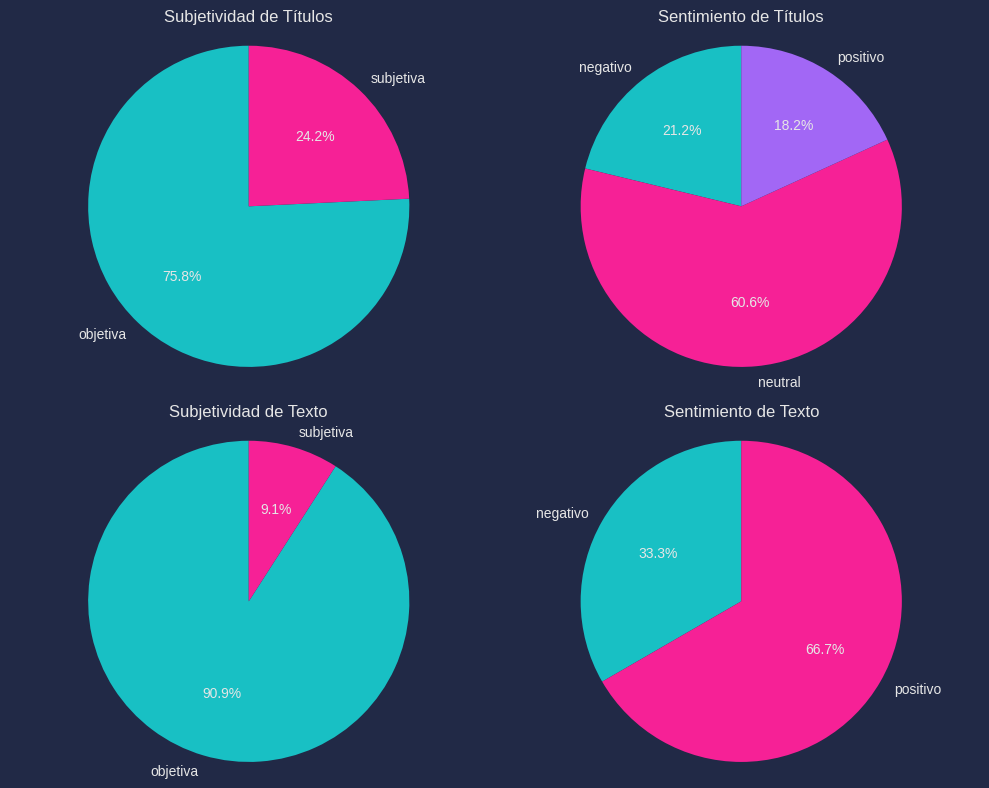

In [48]:
generar_graficos_torta(df_resultados)

### MAPA DE CALOR - HEATMAP
Permite ver las correlaciones entre la objetividad de las noticia y su sentimiento.

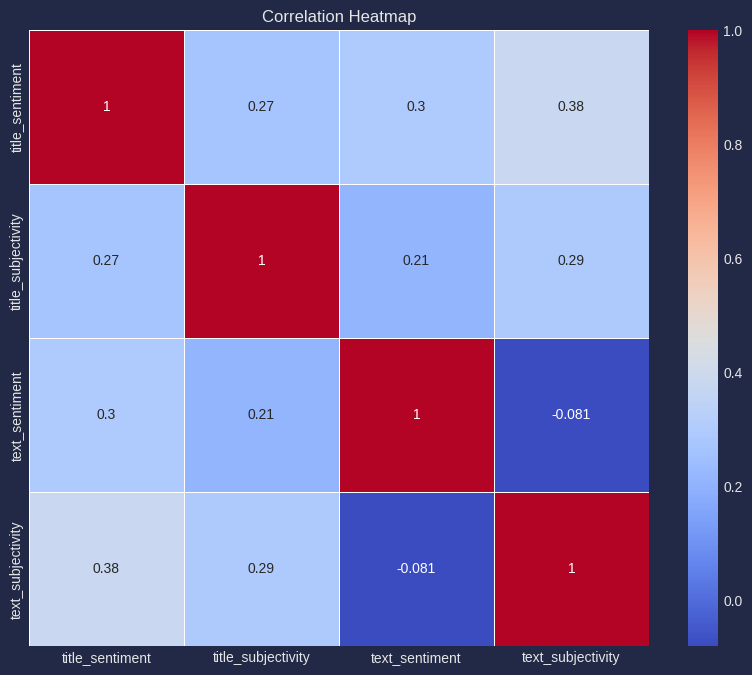

In [49]:
#EJEMPLO DE USO
ax = generar_mapa_calor_correlacion(df_resultados)
plt.show()

###NUBE DE PALABRAS - WORD COUNT

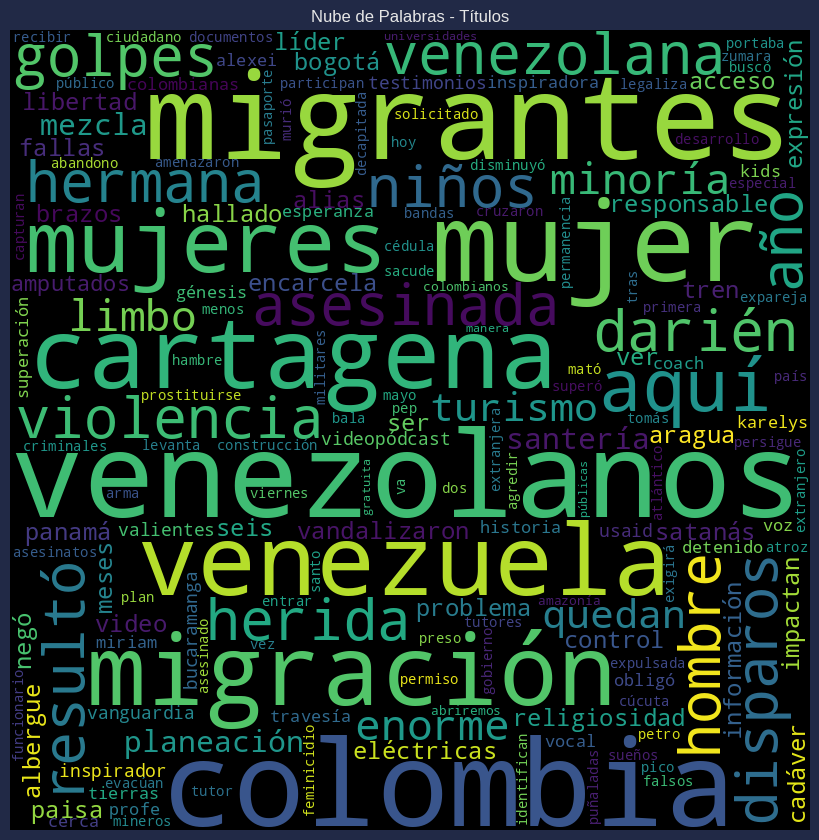

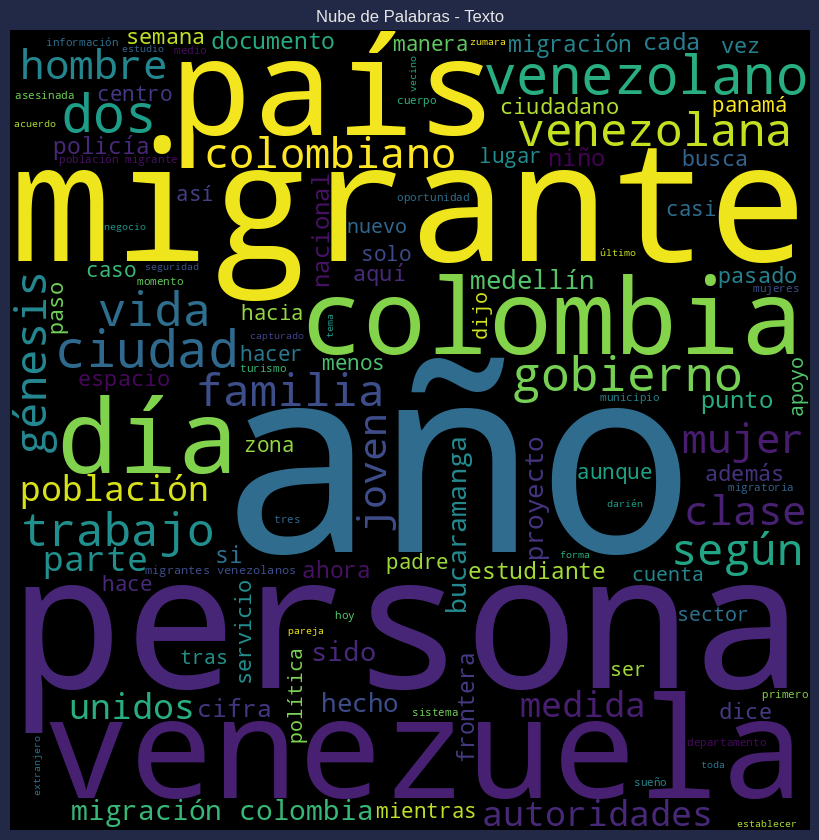

In [50]:
#EJEMPLO DE USO - NO BORRAR
wordcloud_titulos, wordcloud_texto = generar_nubes_palabras(df_resultados)

#ESTO ES NECESARIO PARA MOSTRAR AMBOS A LA VEZ.
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_titulos)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Nube de Palabras - Títulos")
plt.show()

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_texto)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Nube de Palabras - Texto")
plt.show()


### visualiza el dataframe


In [51]:
df_resultados[["title", "sentiment_category_title", "sentiment_category_text", "subjectivity_category_title", "subjectivity_category_text"]]

,title,sentiment_category_title,sentiment_category_text,subjectivity_category_title,subjectivity_category_text
0,Los venezolanos: esa enorme minoría,positivo,positivo,subjetiva,objetiva
1,Venezuela en el limbo,neutral,positivo,objetiva,objetiva
2,Aquí están y aquí se quedan,neutral,positivo,objetiva,objetiva
3,Turismo sin planeación,neutral,negativo,objetiva,objetiva
4,Santería venezolana se mezcla con la religiosi...,neutral,positivo,objetiva,objetiva
5,"“Yo no tengo nada que ver”: alias Satanás, líd...",positivo,negativo,subjetiva,subjetiva
6,"Migración, problema fuera de control",neutral,positivo,objetiva,objetiva
7,Mujer fue asesinada a golpes y disparos; su he...,neutral,negativo,objetiva,objetiva
8,Video Panamá encarcela por seis meses a los 45...,neutral,negativo,objetiva,objetiva
9,Fallas eléctricas en Venezuela impactan la lib...,neutral,positivo,objetiva,objetiva


In [52]:
df_resultados.head()

,title,authors,publisg_date,summary,text,title_clean,text_clean,title_sentiment,title_subjectivity,text_sentiment,text_subjectivity,sentiment_category_title,sentiment_category_text,subjectivity_category_title,subjectivity_category_text
0,Los venezolanos: esa enorme minoría,[],2024-02-09 00:00:00,Lo decía bien la información registrada por EL...,Un estudio bien documentado del programa Medel...,venezolanos enorme minoría,estudio bien documentado programa medellín cóm...,0.4,0.9,0.011443,0.441661,positivo,positivo,subjetiva,objetiva
1,Venezuela en el limbo,[Luis Diego Monsalve],2024-02-09 23:57:00,Por Luis Diego Monsalve - opinión@elcolombiano...,Por Luis Diego Monsalve - opinión@elcolombiano...,venezuela limbo,luis diego monsalve opiniónelcolombianocomcoha...,0.0,0.0,0.136458,0.427604,neutral,positivo,objetiva,objetiva
2,Aquí están y aquí se quedan,[María Bibiana Botero C.],2024-02-11 23:58:00,"Según estudios de la Cepal y la OIM, los migra...",Por María Bibiana Botero Carrera* - www.proant...,aquí aquí quedan,maría bibiana botero carrera wwwproantioquiaor...,0.0,0.0,0.056205,0.409611,neutral,positivo,objetiva,objetiva
3,Turismo sin planeación,[Amalia Londoño Duque],2024-02-12 23:56:00,"La promoción de la ciudad, no fue planeada”, m...",Por Amalia Londoño Duque - amalulduque@gmail.c...,turismo planeación,amalia londoño duque amalulduquegmailcomhace a...,0.0,0.0,-0.056277,0.353707,neutral,negativo,objetiva,objetiva
4,Santería venezolana se mezcla con la religiosi...,[Ángel Castaño Guzmán],2024-03-08 05:41:27,Luego el hombre toma una imagen de cerámica de...,"En el centro comercial Las Orquídeas, al lado ...",santería venezolana mezcla religiosidad paisa,centro comercial orquídeas lado iglesia veracr...,0.0,0.0,0.048113,0.417432,neutral,positivo,objetiva,objetiva
